### Notebook to prepare the full north dataset used for training of different models, combining different code throughout this repo


In [1]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from desiutil.plots import plot_sky_binned, plot_healpix_map


In [2]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))


Approximate resolution at NSIDE 512 is 0.11 deg
Approximate resolution at NSIDE 512 is 0.013 deg


### 1. Get a catalogue of all objects in the Galaxy Survey and prepare the north area

### NORTH

In [3]:
df_north = pd.read_csv('../../bricks_data/galaxy_catalogue_north.csv',
                       dtype={'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8', 'GLBG':'int8','RLBG':'int8'})


In [ ]:
print(df_north.shape)
df_north = df_north.drop_duplicates()

(38050775, 7)


In [ ]:
print(df_north.isna().sum())

In [ ]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_north = df_north.dropna(axis=0, inplace=False, how='any')

print(len(df_north))

In [ ]:
df_north.head()

### 2. Get Galaxy Count per Healpy Pixel


In [ ]:
# LRG

df_LRG = df_north[df_north["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)

print(unique)

mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)
df_lrg.head()

In [ ]:
# elg

df_ELG = df_north[df_north["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)

print(unique)

mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)

print(df_elg.head())

In [ ]:
df_QSO = df_north[df_north["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)

print(unique)

mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

print(df_qso.head())



In [ ]:
df_GLBG = df_north[df_north["GLBG"] == 1]
ra_GLBG = df_GLBG["RA"].to_numpy(copy=True)
dec_GLBG = df_GLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_GLBG, dec_GLBG)

print("Number of GLBGs in Sample:", len(ra_GLBG))

GLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(GLBG_pixel_indices, return_counts=True)

print(unique)

mean_GLBG = counts.mean()
print("Mean GLBGs per Pixel:", mean_GLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_glbg = pd.DataFrame(id_density, columns=['pixel_id', 'glbg'])
df_glbg.pixel_id = df_glbg.pixel_id.astype(int)

print(df_glbg.head())


In [ ]:

df_RLBG = df_north[df_north["RLBG"] == 1]
ra_RLBG = df_RLBG["RA"].to_numpy(copy=True)
dec_RLBG = df_RLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_RLBG, dec_RLBG)

print("Number of RLBGs in Sample:", len(ra_RLBG))

RLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(RLBG_pixel_indices, return_counts=True)

print(unique)

mean_RLBG = counts.mean()
print("Mean RLBGs per Pixel:", mean_RLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_rlbg = pd.DataFrame(id_density, columns=['pixel_id', 'rlbg'])
df_rlbg.pixel_id = df_rlbg.pixel_id.astype(int)

print(df_rlbg.head())


In [ ]:
df_north = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_qso, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_glbg, how='outer', on='pixel_id')
df_north = pd.merge(df_north, df_rlbg, how='outer', on='pixel_id')


print(df_north.isna().sum())


In [ ]:
# Dropping all pixels where I do not have counts for all 3 types of galaxies
df_north.fillna(value=0, inplace=True)
print(df_north.isna().sum())
print(df_north.shape)

### 3. Plotting Galaxy Densities

In [ ]:
m_LRG = np.zeros(NPIX)

m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)


hp.graticule()


"""m_LRG = np.zeros(NPIX)

ra, dec = hp.pix2ang(NSIDE, range(NPIX), lonlat=True)
m_LRG[df_north.pixel_id.to_numpy()] = df_north.lrg.to_numpy()
m_LRG = m_LRG.astype(float)
mask = (m_LRG == 0.0)
m_LRG[mask] = np.nan

ax = plot_sky_binned(ra, dec, data=m_LRG, cmap='jet', label='Number of LRG per pixel', plot_type='healpix',
                     verbose=True, max_bin_area=1.5)"""

In [ ]:
m_ELG = np.zeros(NPIX)

m_ELG[df_north.pixel_id.to_numpy()] = df_north.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
m_QSO = np.zeros(NPIX)

m_QSO[df_north.pixel_id.to_numpy()] = df_north.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
m_GLBG = np.zeros(NPIX)

m_GLBG[df_north.pixel_id.to_numpy()] = df_north.glbg.to_numpy()
mask = (m_GLBG == 0)
m_GLBG[mask] = np.nan
hp.mollview(m_GLBG, title="GLBG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
m_RLBG = np.zeros(NPIX)

m_RLBG[df_north.pixel_id.to_numpy()] = df_north.rlbg.to_numpy()
mask = (m_RLBG == 0)
m_RLBG[mask] = np.nan
hp.mollview(m_RLBG, title="RLBG", format='%i', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [ ]:
# Getting Exposure Densities across pixels


# TODODODODO - Try out both - exposure inclusive and uninclusive

with open(f'../../bricks_data/pixel2ccd_{NSIDE}.pickle', 'rb') as f:
    pixel2ccd_dict_incl = pickle.load(f)
    f.close()

with open(f'../../bricks_data/pixel2ccd_{NSIDE}_non_inclusive.pickle', 'rb') as f:
    pixel2ccd_dict_non_incl = pickle.load(f)
    f.close()


In [ ]:
df_north = df_north.astype(int)
df_north.head()



In [ ]:
pix_ids = df_north.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict_incl[pix])


df_north['exposures_incl'] = exp_len

pix_ids = df_north.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
print(pix_ids)
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict_non_incl[pix])

df_north['exposures_non_incl'] = exp_len

df_north['exposures_diff'] = df_north['exposures_incl'] - df_north['exposures_non_incl']

df_north.head()

In [ ]:
df_north = df_north.astype(int)


In [ ]:
m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures_incl.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP_incl", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:
m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures_non_incl.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP_non_incl", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()


In [ ]:

m_EXP = np.zeros(NPIX)

m_EXP[df_north.pixel_id.to_numpy()] = df_north.exposures_diff.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP_diff", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()


### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

0.0 180.0 -180.0 180.0


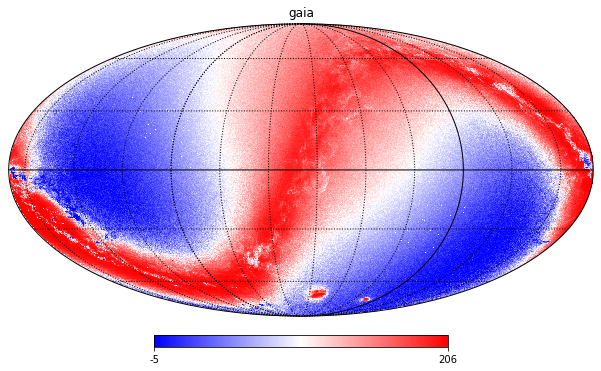

In [37]:
# Import New Systematics here --> maps by Boris

m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



0.0 180.0 -180.0 180.0


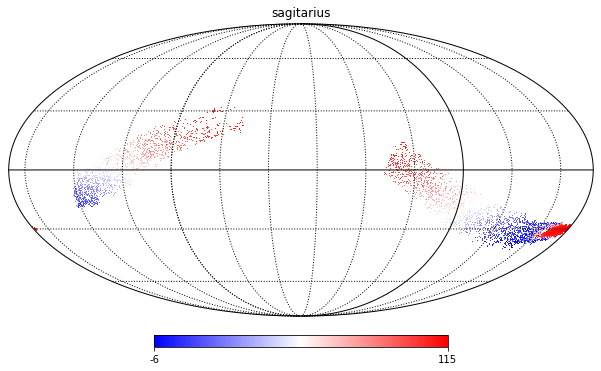

In [42]:
m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()


0.0 180.0 -180.0 180.0


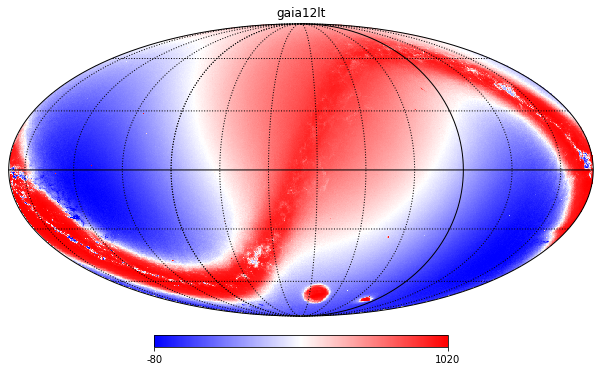

In [41]:
m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12lt", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()


0.0 180.0 -180.0 180.0


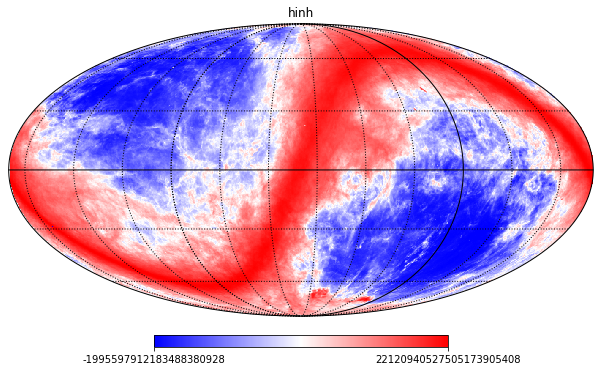

In [76]:
m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="hinh", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



Index(['pixel_id', 'lrg', 'elg', 'qso', 'glbg', 'rlbg', 'exposures', 'stellar',
       'minh', 'hinh_x', 'hinh_y', 'hinh_x', 'hinh_y', 'hinh'],
      dtype='object')


0.0 180.0 -180.0 180.0


"pix_ids = df_north.pixel_id.to_numpy()\nval = np.zeros(len(pix_ids))\nprint(pix_ids)\nfor i, pix in enumerate(pix_ids):\n    val[i] = (m_hinh_ring[i])\n\ndf_north['hinh'] = val"

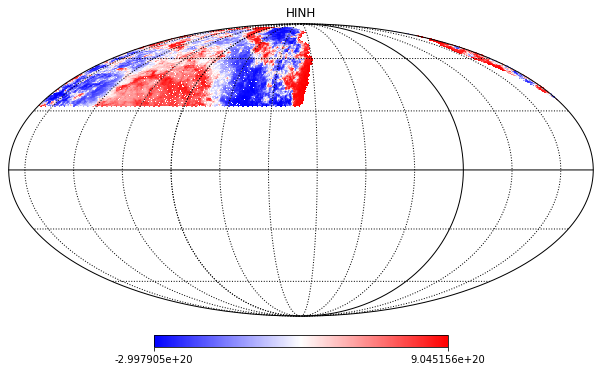

In [78]:

m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

m_hinh = hp.reorder(map_in=m_hinh, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_hinh), axis=1)

df_hinh = pd.DataFrame(id_density, columns=['pixel_id', 'hinh'])
df_hinh.pixel_id = df_hinh.pixel_id.astype(int)

df_north = pd.merge(df_north, df_hinh, how='inner', on='pixel_id')

print(df_north.columns)


m_hinh = np.zeros(NPIX)

m_hinh[df_north.pixel_id.to_numpy()] = df_north.hinh.to_numpy()
mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="HINH", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()


Index(['pixel_id', 'lrg', 'elg', 'qso', 'glbg', 'rlbg', 'exposures', 'stellar',
       'minh', 'hinh_x', 'hinh_y', 'hinh_x', 'hinh_y', 'hinh', 'gaia'],
      dtype='object')


0.0 180.0 -180.0 180.0


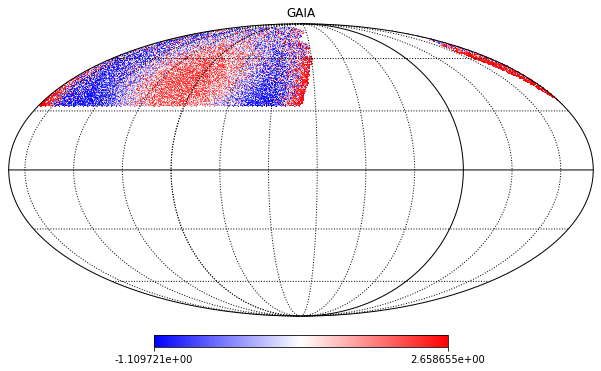

In [79]:
m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")

m_gaia = hp.reorder(map_in=m_gaia, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_gaia), axis=1)

df_gaia = pd.DataFrame(id_density, columns=['pixel_id', 'gaia'])
df_gaia.pixel_id = df_gaia.pixel_id.astype(int)

df_north = pd.merge(df_north, df_gaia, how='inner', on='pixel_id')

print(df_north.columns)


m_gaia = np.zeros(NPIX)

m_gaia[df_north.pixel_id.to_numpy()] = df_north.gaia.to_numpy()
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="GAIA", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()



In [44]:
# ToDo: Adapt here to read different metrics and sys maps

df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_north.csv')


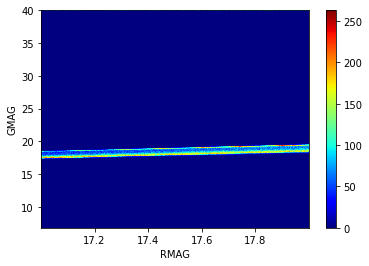

In [45]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [46]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(3831097, 5)


In [47]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [48]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(3464029, 7)


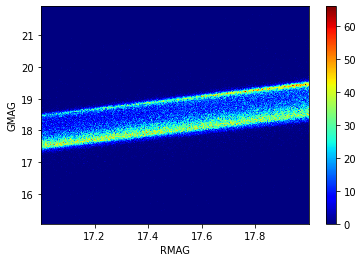

In [49]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [50]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


927    3478
963    3477
921    3477
407    3476
774    3476
       ... 
775    3453
704    3453
408    3452
349    3452
928    3450
Name: percent_RMAG, Length: 1000, dtype: int64

In [51]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [52]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(3464029, 12)

In [53]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [54]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [55]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(3464029, 12)
(3436156, 12)


(3414224, 12)

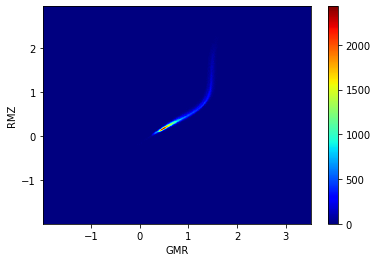

In [56]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [57]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())





Number of stellars in Sample: 3414224
[   6481    6482    6483 ... 1616869 1616870 1616874]
Mean stellars per Pixel: 8.732053023153512
[[   6481       2]
 [   6482       1]
 [   6483       2]
 ...
 [1616869       1]
 [1616870       2]
 [1616874       1]]
   pixel_id  stellar
0      6481        2
1      6482        1
2      6483        2
3      6484        3
4      6485        2
pixel_id    0
stellar     0
dtype: int64


In [58]:
df_north = df_north.merge(df_stellar, how='inner', on='pixel_id')
print(df_north.isna().sum())
df_north.shape

pixel_id     0
lrg          0
elg          0
qso          0
glbg         0
rlbg         0
exposures    0
stellar      0
dtype: int64


(382975, 8)

In [59]:
df_north.head()

,pixel_id,lrg,elg,qso,glbg,rlbg,exposures,stellar
0,6481,1,16,3,18,3,2,2
1,6482,1,7,1,11,4,1,1
2,6483,1,3,2,5,2,1,2
3,6484,3,4,1,16,1,1,3
4,6485,3,4,5,15,3,1,2


0.0 180.0 -180.0 180.0


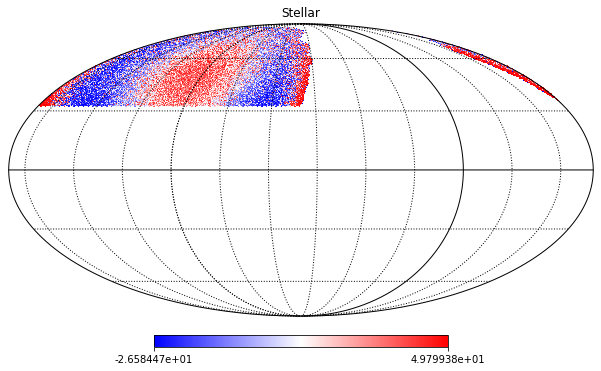

In [61]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_north.pixel_id.to_numpy()] = df_north.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [110]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [111]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [112]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_north["pixel_id"].to_numpy()
print(pixels_ids)
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

[  1560   1561   1562 ... 404975 404976 404979]


In [113]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_north["EBV"] = ebv

In [114]:
df_north.EBV.describe()
df_north.head()


,pixel_id,lrg,elg,qso,exposures,stellar,EBV
0,1560,1,7,8,11,1,0.157148
1,1561,3,4,6,10,3,0.277929
2,1562,1,5,6,10,2,0.255054
3,1564,2,4,10,10,1,0.208612
4,1565,2,11,7,9,3,0.247232


0.0 180.0 -180.0 180.0


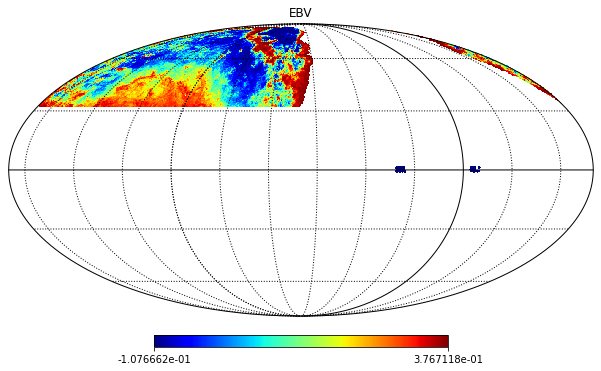

In [115]:
m_EBV = np.zeros(NPIX)

m_EBV[df_north.pixel_id.to_numpy()] = df_north.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [116]:
df_north.exposures = df_north.exposures.astype(int)
df_north.head()


,pixel_id,lrg,elg,qso,exposures,stellar,EBV
0,1560,1,7,8,11,1,0.157148
1,1561,3,4,6,10,3,0.277929
2,1562,1,5,6,10,2,0.255054
3,1564,2,4,10,10,1,0.208612
4,1565,2,11,7,9,3,0.247232


In [117]:
with open('../../bricks_data/pixel2systematics_geometric_non_inclusive.pickle', 'rb') as f:
    geo_dict = pickle.load(f)
    f.close()

print(len(geo_dict.keys()))

446042


In [118]:
sys_list = []
for key in geo_dict.keys():
    ind_sys_list = geo_dict[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_no = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [119]:
print(len((df_sys_geo_no)))

446042


In [120]:
df_north = df_north.merge(df_sys_geo_no, how='inner', on='pixel_id')
print(len(df_north))
print(len(df_north))

99693
99693


In [121]:
print(df_north.isna().sum())

pixel_id            0
lrg                 0
elg                 0
qso                 0
exposures           0
stellar             0
EBV                 0
airmass             0
ccdskysb_g         30
ccdskysb_r          0
ccdskysb_z          1
exptime_g           0
exptime_r           0
exptime_z           0
meansky_g           0
meansky_r           0
meansky_z           0
galdepth_g          0
galdepth_r          0
galdepth_z          0
seeing_g            0
seeing_r            0
seeing_z            0
psfdepth_g          0
psfdepth_r          0
psfdepth_z          0
psfnorm_mean_g      0
psfnorm_mean_r      0
psfnorm_mean_z      0
gausspsfdepth_g     0
gausspsfdepth_r     0
gausspsfdepth_z     0
pixel_covered       0
dtype: int64


In [122]:
df_north.dropna(axis=0, inplace=True)
print(df_north.isna().sum())

pixel_id           0
lrg                0
elg                0
qso                0
exposures          0
stellar            0
EBV                0
airmass            0
ccdskysb_g         0
ccdskysb_r         0
ccdskysb_z         0
exptime_g          0
exptime_r          0
exptime_z          0
meansky_g          0
meansky_r          0
meansky_z          0
galdepth_g         0
galdepth_r         0
galdepth_z         0
seeing_g           0
seeing_r           0
seeing_z           0
psfdepth_g         0
psfdepth_r         0
psfdepth_z         0
psfnorm_mean_g     0
psfnorm_mean_r     0
psfnorm_mean_z     0
gausspsfdepth_g    0
gausspsfdepth_r    0
gausspsfdepth_z    0
pixel_covered      0
dtype: int64


In [123]:
print(df_north.describe())

            pixel_id           lrg           elg           qso     exposures  \
count   99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean    94717.378469     35.493859    124.771086    152.997692     43.975999   
std     58358.652988     13.870803     23.162993     29.519543     81.547286   
min      1667.000000      1.000000      1.000000      1.000000      5.000000   
25%     47504.250000     27.000000    111.000000    134.000000     32.000000   
50%     91700.500000     34.000000    124.000000    152.000000     36.000000   
75%    138432.750000     41.000000    139.000000    171.000000     41.000000   
max    404979.000000    708.000000    703.000000    471.000000   4145.000000   

            stellar           EBV       airmass    ccdskysb_g    ccdskysb_r  \
count  99662.000000  99662.000000  99662.000000  99662.000000  99662.000000   
mean      34.171189      0.035287      1.216792     23.383511     22.578218   
std       31.451833      0.031403      0.1

In [124]:
cols = list(df_north.columns)
cols.remove('pixel_id')


In [125]:
df_north.head()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,psfdepth_g,psfdepth_r,psfdepth_z,psfnorm_mean_g,psfnorm_mean_r,psfnorm_mean_z,gausspsfdepth_g,gausspsfdepth_r,gausspsfdepth_z,pixel_covered
0,1667,10,31,48,14,5,0.060365,1.686962,23.600771,21.159200,...,23.830227,22.268559,22.429981,0.145224,0.137983,0.138423,24.013548,22.542369,22.598709,0.765625
1,1668,7,30,43,14,7,0.071565,1.692857,23.556622,21.281648,...,23.785484,22.196788,22.369873,0.151245,0.139262,0.136332,23.949081,22.452972,22.572845,0.750000
2,1669,9,38,44,15,6,0.065674,1.691899,23.558167,21.281731,...,23.857937,22.182335,22.571241,0.148223,0.134278,0.135896,24.037708,22.431852,22.746758,0.765625
3,1670,8,45,53,12,10,0.076584,1.699775,23.498325,21.441406,...,23.983856,22.338346,22.524883,0.172615,0.135743,0.134056,24.151823,22.640640,22.679184,0.765625
4,1671,9,40,54,13,16,0.114809,1.721909,23.496811,21.440643,...,24.072981,22.318738,22.630867,0.167368,0.132003,0.140934,24.254847,22.600306,22.837112,0.750000


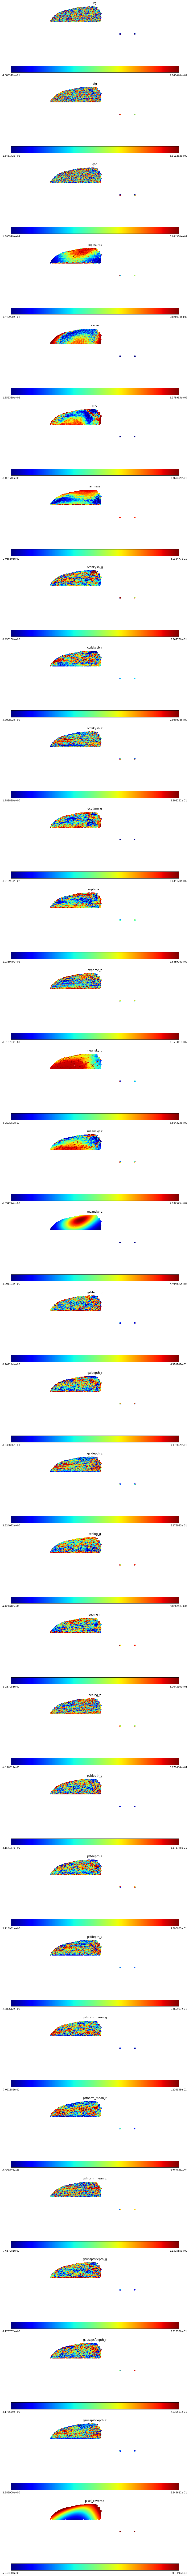

In [126]:
nrows = 32
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200, 200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_north.pixel_id.to_numpy()] = df_north[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), format='%e', norm='hist', cmap="jet", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [127]:
df_north.describe()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,psfdepth_g,psfdepth_r,psfdepth_z,psfnorm_mean_g,psfnorm_mean_r,psfnorm_mean_z,gausspsfdepth_g,gausspsfdepth_r,gausspsfdepth_z,pixel_covered
count,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,...,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000,99662.000000
mean,94717.378469,35.493859,124.771086,152.997692,43.975999,34.171189,0.035287,1.216792,23.383511,22.578218,...,23.641866,23.019976,22.567059,0.157880,0.178107,0.137536,23.829691,23.189176,22.764928,0.999827
std,58358.652988,13.870803,23.162993,29.519543,81.547286,31.451833,0.031403,0.196178,0.206255,0.299810,...,0.212061,0.240630,0.267901,0.019418,0.024557,0.022794,0.223880,0.239627,0.274575,0.005254
min,1667.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.002823,1.000179,19.810131,19.743704,...,20.088421,18.947199,0.000000,0.077112,0.094105,0.000000,19.363297,19.028231,0.000000,0.750000
25%,47504.250000,27.000000,111.000000,134.000000,32.000000,15.000000,0.014674,1.055321,23.307539,22.423604,...,23.570854,22.939775,22.474605,0.144526,0.160623,0.126237,23.758925,23.111324,22.670864,1.000000
50%,91700.500000,34.000000,124.000000,152.000000,36.000000,22.000000,0.023096,1.153695,23.418670,22.627118,...,23.658188,23.065406,22.619300,0.157924,0.177725,0.136982,23.848361,23.226860,22.821491,1.000000
75%,138432.750000,41.000000,139.000000,171.000000,41.000000,41.000000,0.045453,1.316486,23.514771,22.780234,...,23.750104,23.157356,22.726440,0.170658,0.194895,0.148283,23.943942,23.324144,22.927848,1.000000
max,404979.000000,708.000000,703.000000,471.000000,4145.000000,664.000000,0.431732,2.132062,23.829928,25.279337,...,24.318750,23.826775,23.347145,0.285245,0.276389,3.160772,24.483849,23.986845,23.560917,1.000000


### Removing all pixels from the other corpus

In [128]:

df_north['RA'], df_north['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_north.pixel_id.to_numpy(), lonlat=True)

df_north.head()

,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,...,psfdepth_z,psfnorm_mean_g,psfnorm_mean_r,psfnorm_mean_z,gausspsfdepth_g,gausspsfdepth_r,gausspsfdepth_z,pixel_covered,RA,DEC
0,1667,10,31,48,14,5,0.060365,1.686962,23.600771,21.159200,...,22.429981,0.145224,0.137983,0.138423,24.013548,22.542369,22.598709,0.765625,135.000000,84.698607
1,1668,7,30,43,14,7,0.071565,1.692857,23.556622,21.281648,...,22.369873,0.151245,0.139262,0.136332,23.949081,22.452972,22.572845,0.750000,138.103448,84.698607
2,1669,9,38,44,15,6,0.065674,1.691899,23.558167,21.281731,...,22.571241,0.148223,0.134278,0.135896,24.037708,22.431852,22.746758,0.765625,141.206897,84.698607
3,1670,8,45,53,12,10,0.076584,1.699775,23.498325,21.441406,...,22.524883,0.172615,0.135743,0.134056,24.151823,22.640640,22.679184,0.765625,144.310345,84.698607
4,1671,9,40,54,13,16,0.114809,1.721909,23.496811,21.440643,...,22.630867,0.167368,0.132003,0.140934,24.254847,22.600306,22.837112,0.750000,147.413793,84.698607


In [129]:
df_no_island = df_north[df_north.DEC < 15]

df_comp = df_north[df_north.DEC > 20]

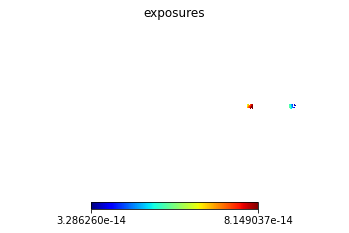

In [130]:
m = np.zeros(NPIX)

m[df_no_island.pixel_id.to_numpy()] = df_no_island['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)

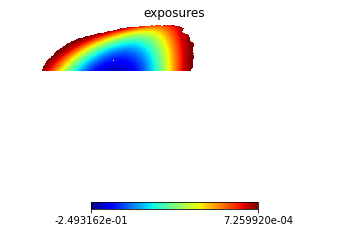

In [131]:
m = np.zeros(NPIX)

m[df_comp.pixel_id.to_numpy()] = df_comp['pixel_covered'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures', format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


#### Removing All Outliers


In [132]:
col = list(df_comp.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'galdepth_g', 'galdepth_r', 'galdepth_z', 'seeing_g', 'seeing_r', 'seeing_z', 'psfdepth_g', 'psfdepth_r', 'psfdepth_z', 'psfnorm_mean_g', 'psfnorm_mean_r', 'psfnorm_mean_z', 'gausspsfdepth_g', 'gausspsfdepth_r', 'gausspsfdepth_z', 'pixel_covered', 'RA', 'DEC']


In [133]:
df_no_outlier = df_comp.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z', 'pixel_covered']


In [134]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_comp)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_comp) - len(df_no_outlier)}")

98916
Element:  pixel_id | No of Elems with Z higher than factor  :  0
Element:  lrg | No of Elems with Z higher than factor  :  181
Element:  elg | No of Elems with Z higher than factor  :  17
Element:  qso | No of Elems with Z higher than factor  :  0
Element:  exposures | No of Elems with Z higher than factor  :  64
Element:  stellar | No of Elems with Z higher than factor  :  6
Element:  EBV | No of Elems with Z higher than factor  :  62
Element:  airmass | No of Elems with Z higher than factor  :  0
Element:  ccdskysb_g | No of Elems with Z higher than factor  :  185
Element:  ccdskysb_r | No of Elems with Z higher than factor  :  13
Element:  ccdskysb_z | No of Elems with Z higher than factor  :  1
Element:  exptime_g | No of Elems with Z higher than factor  :  0
Element:  exptime_r | No of Elems with Z higher than factor  :  0
Element:  exptime_z | No of Elems with Z higher than factor  :  0
Element:  meansky_g | No of Elems with Z higher than factor  :  211
Element:  meansky_r 

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

(97560, 22)
156
40.525604756047564
36.0
22
0


(array([  310., 46518., 39828.,  4307.,  1284.,  2029.,  2137.,   882.,
          210.,    55.]),
 array([  6.,  21.,  36.,  51.,  66.,  81.,  96., 111., 126., 141., 156.]),
 <BarContainer object of 10 artists>)

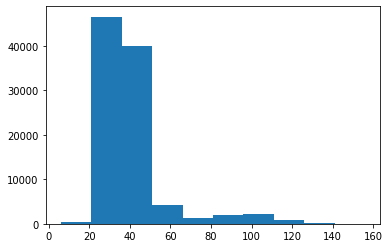

In [135]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))



plt.hist(df_no_outlier.exposures)


In [136]:
print(len(df_no_outlier[df_no_outlier.exposures < 7]))


2


In [65]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

(97537, 22)


### Scaling the Data

In [66]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')


cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
"""df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()
"""

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



['pixel_id', 'lrg', 'elg', 'qso', 'exposures', 'stellar', 'EBV', 'airmass', 'ccdskysb_g', 'ccdskysb_r', 'ccdskysb_z', 'exptime_g', 'exptime_r', 'exptime_z', 'meansky_g', 'meansky_r', 'meansky_z', 'seeing_g', 'seeing_r', 'seeing_z']


,pixel_id,lrg,elg,qso,exposures,stellar,EBV,airmass,ccdskysb_g,ccdskysb_r,ccdskysb_z,exptime_g,exptime_r,exptime_z,meansky_g,meansky_r,meansky_z,seeing_g,seeing_r,seeing_z
count,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000,97537.000000
mean,92731.071152,35.285348,124.999006,153.217415,0.241251,0.138901,0.134040,0.189964,0.760600,0.621842,0.578411,0.415078,0.373355,0.449175,0.025046,0.023595,0.016418,0.178080,0.177574,0.085067
std,52360.031049,11.989935,22.240916,28.685713,0.116945,0.130912,0.127898,0.173170,0.097299,0.090133,0.101528,0.127518,0.185381,0.120251,0.039663,0.047011,0.027415,0.062859,0.068545,0.035447
min,1672.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47549.000000,27.000000,111.000000,134.000000,0.181818,0.058577,0.049266,0.048085,0.717928,0.574296,0.508402,0.314711,0.227531,0.349533,0.014887,0.009442,0.007474,0.134342,0.129996,0.061880
50%,91538.000000,34.000000,125.000000,152.000000,0.209790,0.087866,0.083365,0.133030,0.777134,0.635940,0.583729,0.393645,0.329463,0.424095,0.018813,0.014304,0.010774,0.166365,0.166840,0.080584
75%,137457.000000,41.000000,139.000000,171.000000,0.244755,0.167364,0.177358,0.279431,0.828569,0.682973,0.650801,0.494846,0.480819,0.526320,0.024177,0.023524,0.016707,0.210105,0.214111,0.102415
max,186645.000000,131.000000,285.000000,334.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


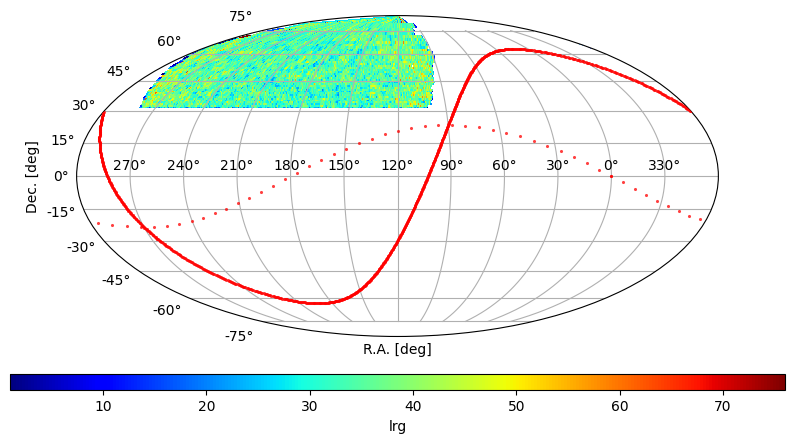

In [67]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='jet',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


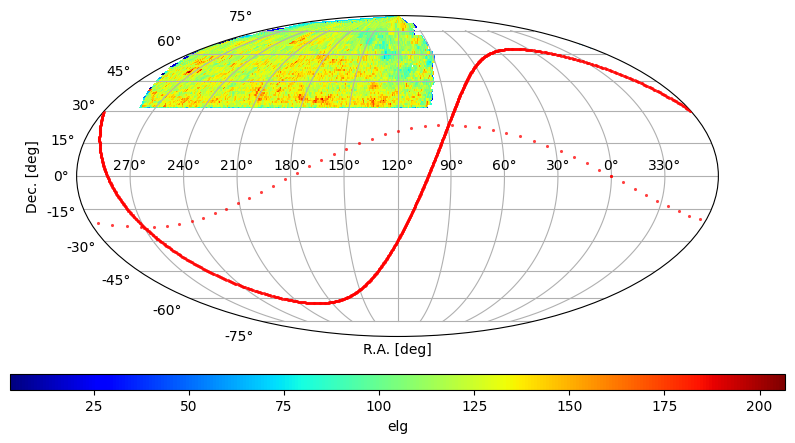

In [68]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='jet',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5)

Using 163 x 507 grid in cos(DEC) x RA with pixel area 0.499 sq.deg.


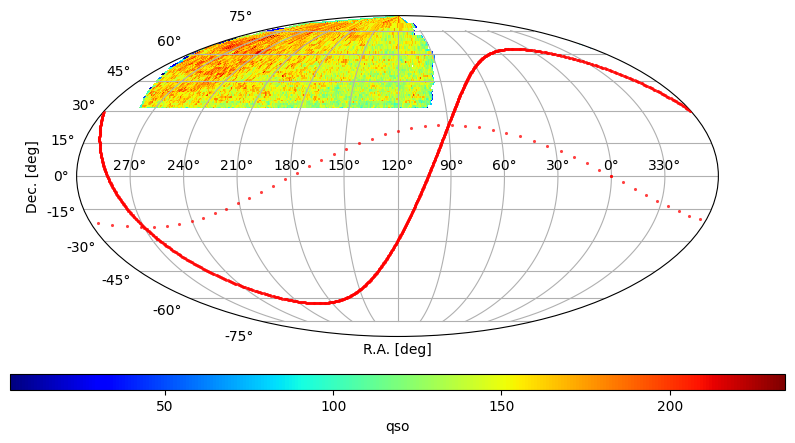

In [69]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='jet',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5)

In [70]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


       pixel_id  lrg  elg  qso  exposures   stellar       EBV   airmass  \
33391     62102   30  137  169   0.230769  0.205021  0.078533  0.175817   
24935     47512   39  109  214   0.209790  0.104603  0.043074  0.176816   
74479    138135   36  125  173   0.230769  0.087866  0.042296  0.054642   
17251     34254   58   71  125   0.223776  0.138075  0.288703  0.339578   
50463     92710   30  120  174   0.265734  0.799163  0.383586  0.178532   

       ccdskysb_g  ccdskysb_r  ccdskysb_z  exptime_g  exptime_r  exptime_z  \
33391    0.705554    0.689368    0.512222   0.335234   0.307320   0.595147   
24935    0.834326    0.550439    0.526078   0.266912   0.416220   0.463166   
74479    0.776730    0.610723    0.599124   0.305215   0.279268   0.342520   
17251    0.853181    0.692403    0.555437   0.384357   0.435739   0.562761   
50463    0.799223    0.167260    0.622441   0.452397   0.484762   0.559712   

       meansky_g  meansky_r  meansky_z  seeing_g  seeing_r  seeing_z  
33391   0

In [71]:
df_train.to_csv('../../bricks_data/north.csv', index=False)
df_test.to_csv('../../bricks_data/north_test.csv', index=False)